# Exploratory Data Analysis: Haberman's Survival Dataset

The haberman's survival data set contains data related to patients who had undergone breast cancer surgery between 1958 to 1970.
Attributes:
* age--> Age at the time of operation
* op_year--> Year of operation
* axil_nodes_det--> Positive axillary nodes detected i.e lymph nodes having cancer cells
* surv_status--> Patient survival status i.e 1 if survived 5 years or more and 2 if died before 5 years 

# Objective - Is the survival rate depends upon age and axil_nodes_det?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset using pandas library
hsd = pd.read_csv('haberman.csv',header = None,names=['age','op_year','axil_nodes_det','surv_status'])

In [19]:
hsd.head()

,age,op_year,axil_nodes_det,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [57]:
hsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
op_year           306 non-null int64
axil_nodes_det    306 non-null int64
surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [16]:
hsd.shape

(306, 4)

**Observation**
The above dataset has 306 datapoints with 4 features present.

# Univariate analysis

## PDF(Probability density function)

In [4]:
import warnings
warnings.filterwarnings('ignore')

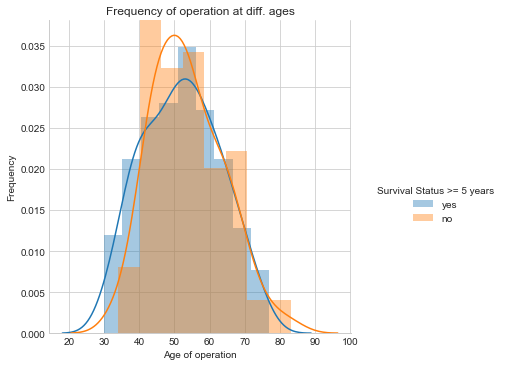

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(hsd,hue='surv_status',size=5)\
   .map(sns.distplot,'age')
plt.xlabel('Age of operation')
plt.ylabel('Frequency')
plt.title('Frequency of operation at diff. ages')
plt.legend([1,2],labels = ['yes','no'],title = 'Survival Status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()

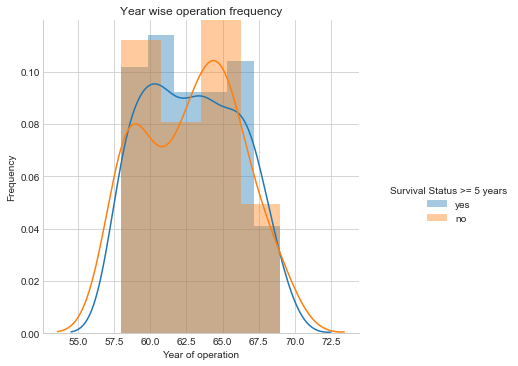

In [6]:
sns.FacetGrid(hsd,hue='surv_status',size=5)\
   .map(sns.distplot,'op_year')
plt.xlabel('Year of operation')
plt.ylabel('Frequency')
plt.title('Year wise operation frequency')
plt.legend([1,2],labels = ['yes','no'],title = 'Survival Status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()

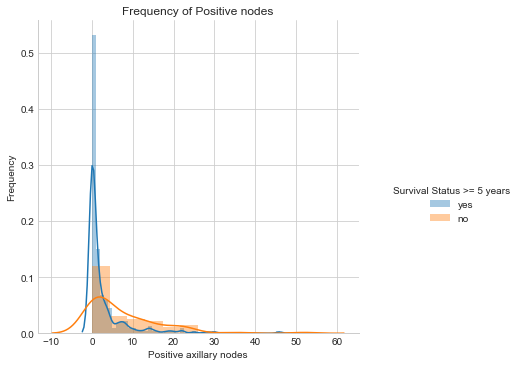

In [14]:
sns.FacetGrid(hsd,hue='surv_status',size=5)\
   .map(sns.distplot,'axil_nodes_det')
plt.xlabel('Positive axillary nodes')
plt.ylabel('Frequency')
plt.title('Frequency of Positive nodes')
plt.legend([1,2],labels = ['yes','no'],title = 'Survival Status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()

**observation**
* The above histogram concludes that lesser the number of axillary nodes higher the survival rate.
* Patients having 0 axillary nodes are more likely to survive

## CDF(Cumulative density function)

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


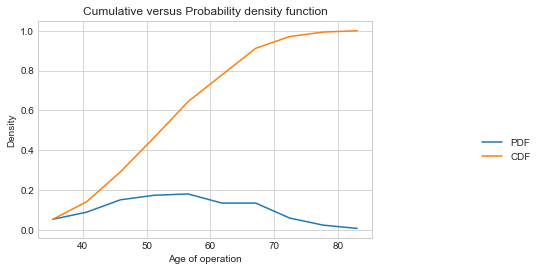

In [26]:
#age    
counts,bin_edges = np.histogram(hsd['age'],bins=10,density=True)
#calculate pdf
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
#calculating cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age of operation')
plt.ylabel('Density')
plt.title('Cumulative versus Probability density function')
plt.legend(labels = ['PDF','CDF'],bbox_to_anchor=(1.5, 0.5))

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


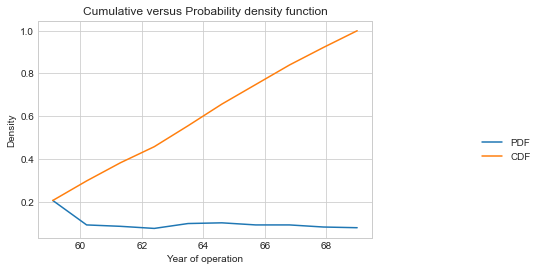

In [27]:
#op_year
counts,bin_edges = np.histogram(hsd['op_year'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Year of operation')
plt.ylabel('Density')
plt.title('Cumulative versus Probability density function')
plt.legend(labels = ['PDF','CDF'],bbox_to_anchor=(1.5, 0.5))

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


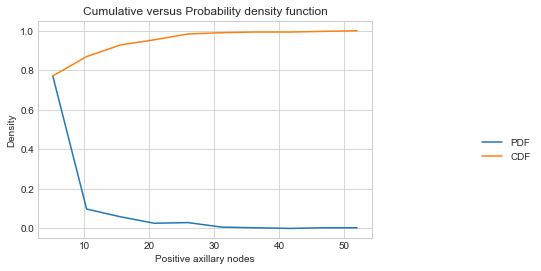

In [28]:

#axil_nodes_det
counts,bin_edges = np.histogram(hsd['axil_nodes_det'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Positive axillary nodes')
plt.ylabel('Density')
plt.title('Cumulative versus Probability density function')
plt.legend(labels = ['PDF','CDF'],bbox_to_anchor=(1.5, 0.5))

**Observation**
* Approximately 77% of patients have 5 or less positive axillary nodes

## Box-plot

In [15]:
#Factorising Survival status
hsd['surv_status'].replace([1,2],['yes','no'],inplace = True)

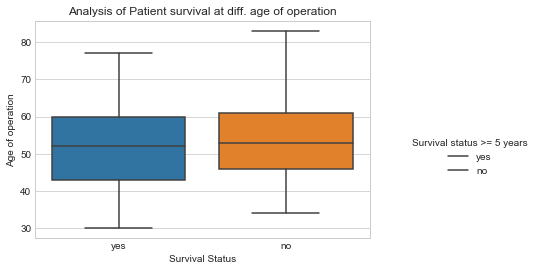

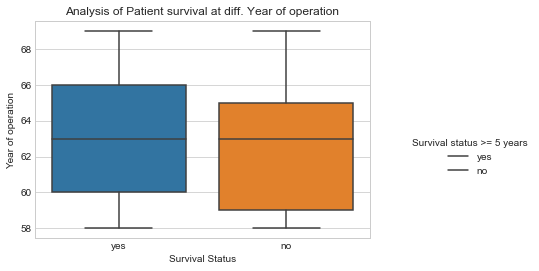

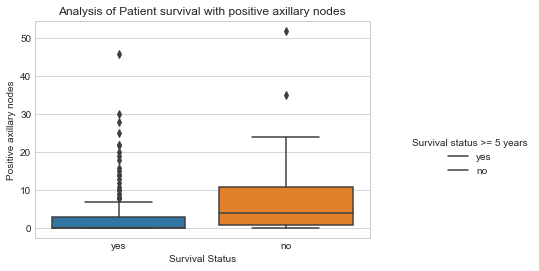

In [17]:
sns.boxplot(x='surv_status',y = 'age',data= hsd)
plt.ylabel('Age of operation')
plt.xlabel('Survival Status')
plt.title('Analysis of Patient survival at diff. age of operation')
plt.legend(labels = ['yes','no'],title = 'Survival status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()
sns.boxplot(x='surv_status',y = 'op_year',data= hsd)
plt.ylabel('Year of operation')
plt.xlabel('Survival Status')
plt.title('Analysis of Patient survival at diff. Year of operation')
plt.legend(labels = ['yes','no'],title = 'Survival status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()
sns.boxplot(x='surv_status',y = 'axil_nodes_det',data= hsd)
plt.ylabel('Positive axillary nodes')
plt.xlabel('Survival Status')
plt.title('Analysis of Patient survival with positive axillary nodes')
plt.legend(labels = ['yes','no'],title = 'Survival status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()

## Violin-Plots

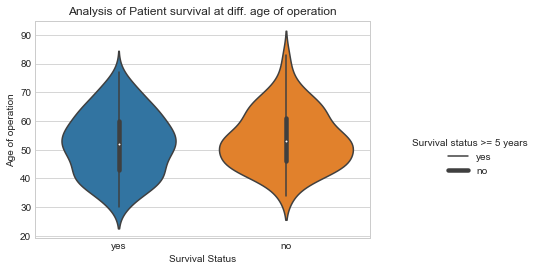

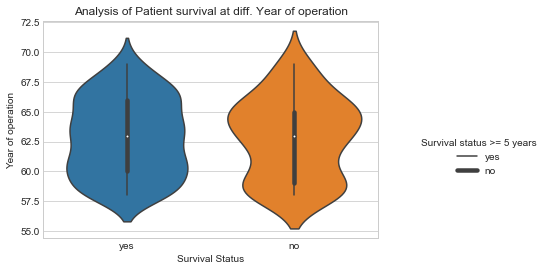

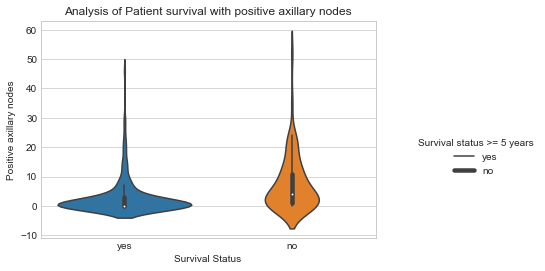

In [18]:
sns.violinplot(x='surv_status',y = 'age',data= hsd)
plt.ylabel('Age of operation')
plt.xlabel('Survival Status')
plt.title('Analysis of Patient survival at diff. age of operation')
plt.legend(labels = ['yes','no'],title = 'Survival status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()
sns.violinplot(x='surv_status',y = 'op_year',data= hsd)
plt.ylabel('Year of operation')
plt.xlabel('Survival Status')
plt.title('Analysis of Patient survival at diff. Year of operation')
plt.legend(labels = ['yes','no'],title = 'Survival status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()
sns.violinplot(x='surv_status',y = 'axil_nodes_det',data= hsd)
plt.ylabel('Positive axillary nodes')
plt.xlabel('Survival Status')
plt.title('Analysis of Patient survival with positive axillary nodes')
plt.legend(labels = ['yes','no'],title = 'Survival status >= 5 years',bbox_to_anchor=(1.5, 0.5))
plt.show()

**Observation**
* Status of survival in accordance with age
  1. Patients are more likely to survive for 5 years or more if the age of operation is below 36.
  2. Survival rate of Patients decreased if the age of operation is more than 60.
* Status of survival in accordance with axillary node
  1. 25% of patients have 0 positive axillary nodes hence they are more likely to survive 5years or more.
  2. 75% of the patients have positive axillary node between 1 to 4 hence they are little less likely to suvive in                    comparision to those having 0 positive axillary nodes.
  3. Patients those are having axillary more than 4 are very less likey to survive more than 5 years.
* Patients who had operation after 1965 are more likely to survive


# Bi-Variate Analysis

## Pair-Plot

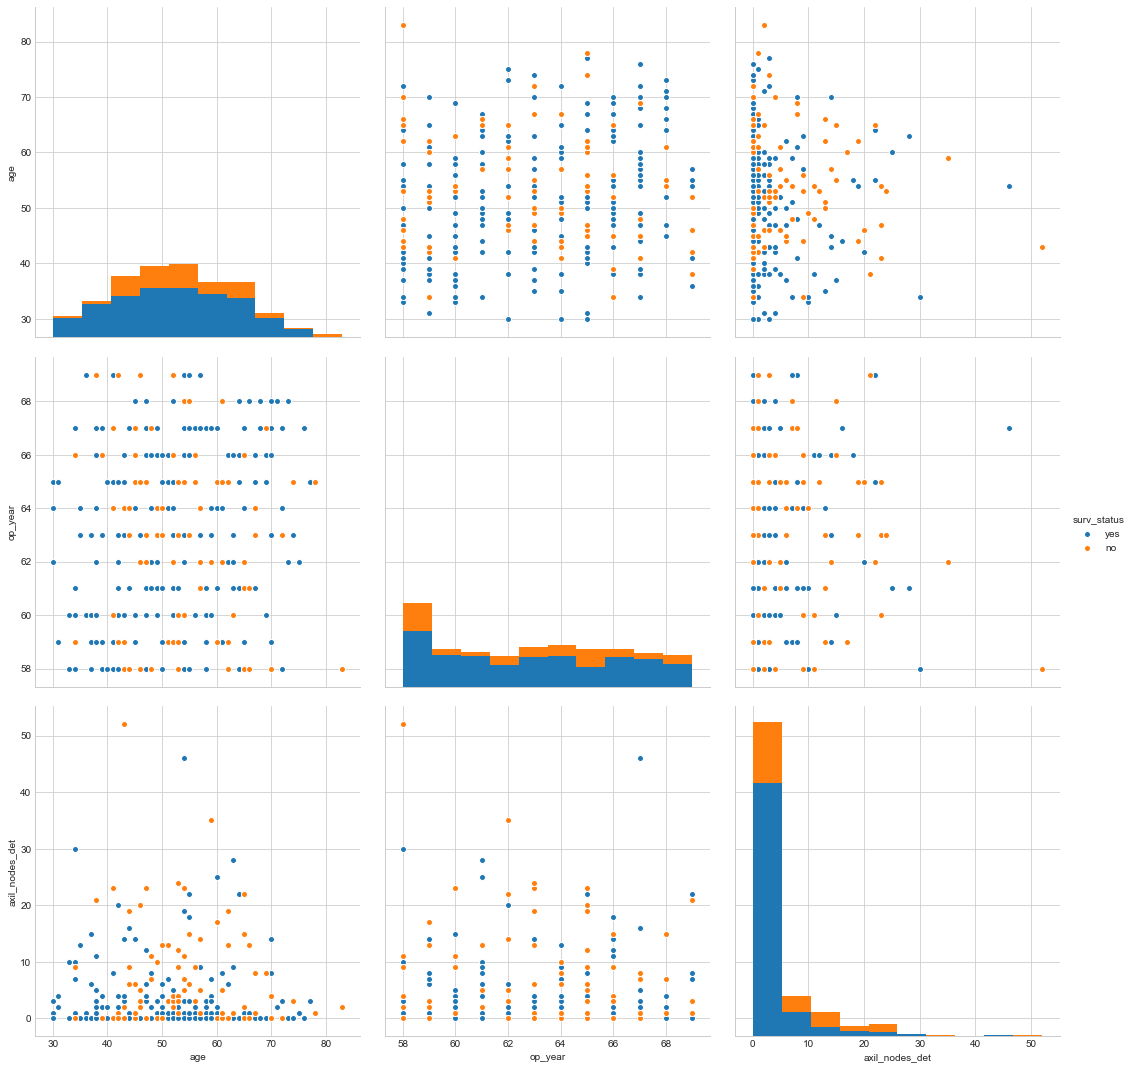

In [20]:
sns.set_style('whitegrid')
sns.pairplot(hsd,hue='surv_status',size = 5)
plt.show()

**observation** 
* Survival status 1 is clearly more than 2 among the patients of breast cancer.
* As years passed by operations per year are decreased

## Scatter plot

As we can see a relation of axillary nodes with age of operation. Lets plot the scatterplot independently.

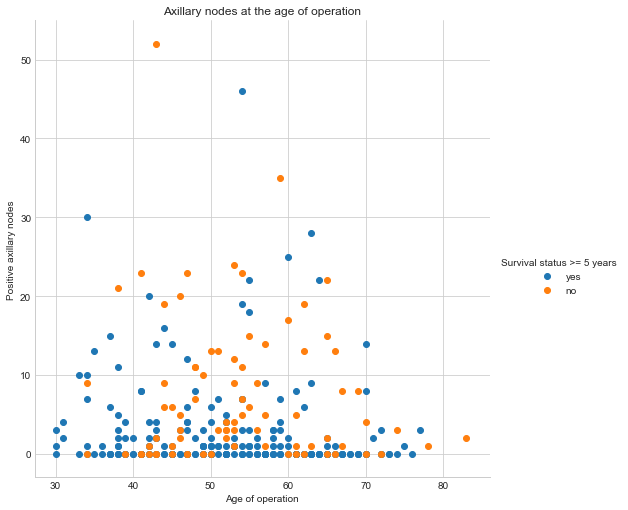

In [19]:
sns.FacetGrid(data=hsd,hue ='surv_status',size=7)\
   .map(plt.scatter,'age','axil_nodes_det')
plt.xlabel('Age of operation')
plt.ylabel('Positive axillary nodes')
plt.title('Axillary nodes at the age of operation')
plt.legend(bbox_to_anchor=(1.3, 0.5),title = 'Survival status >= 5 years')
plt.show()

**Observation**
* Operation at the Age ranging from 30-40.
  1. Have positive auxillary node from 0-15 approx with some outliers of 21 and 30.
  2. Have higher chance of living more than 5 years.
* Operation at the Age ranging from 40-70.
  1. Have positive higher amount of axillary node ranging from 0-25 with some outliers of 34 and 52. 
  2. Have equal chances of living more than 5years or dying.
* Operation at the Age more than 70.
  1. Have positive axillary node not more than 5.
  2. Chances are most likely to live more than 5 years.

## Conclusion

->  Axillary nodes is the most powerfull feature of the dataset.

->  We can't separate different variables because of the overlapping present in the data.

->  Patients having 0 positive axillary nodes are more likely to survive for more than 5 Years.

->  77%(approx) of the patients have not more than 5 positive axillary nodes.

->  Number of patients with 20 plus axillary nodes are very less.

->  Patients having operation at age range 40-70 have the highest number of postive axillary nodes.

->  Patients who had operation at the age of 36 or below are more likely to survive.

->  Number of patients having operation after age 70 has positive axillary nodes not more than 5.

->  Patients who had operation in the 65 are more likely to die before 5 years. 